In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

# Carregar os dados de treino e teste
df_train = pd.read_csv("dados_treinamento.csv")
df_test = pd.read_csv("dados_teste.csv")


In [10]:

# Dados de treino
X_train = df_train.drop(columns=["class"])
y_train = df_train["class"]

# Dados de teste
X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

# Só para garantir que está sendo dividido corretamente:
print('Treinamento:',y_train.value_counts())
print('--------------   ------------------')
print('Teste:',y_test.value_counts())



Treinamento: class
hasgame    210
xwin       210
owin       206
tie         22
Name: count, dtype: int64
--------------   ------------------
Teste: class
hasgame    90
xwin       90
owin       88
tie        10
Name: count, dtype: int64


In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [12]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.6007194244604317
Precisão: 0.7691024149772905
Recall: 0.5765151515151515
F1-Score: 0.6002870788050676


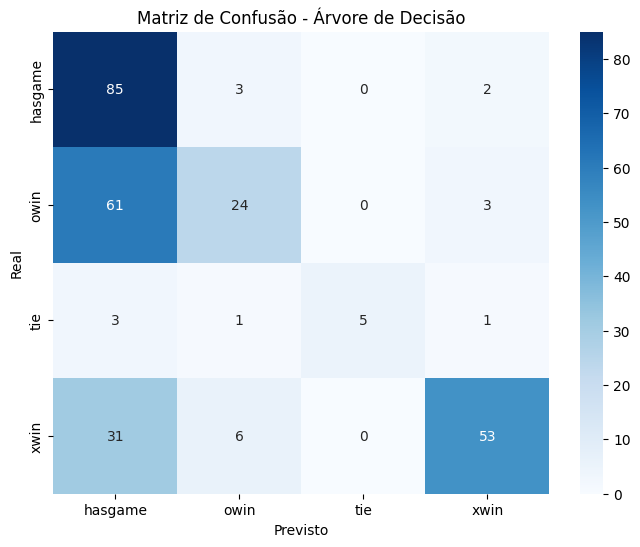

In [17]:

conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

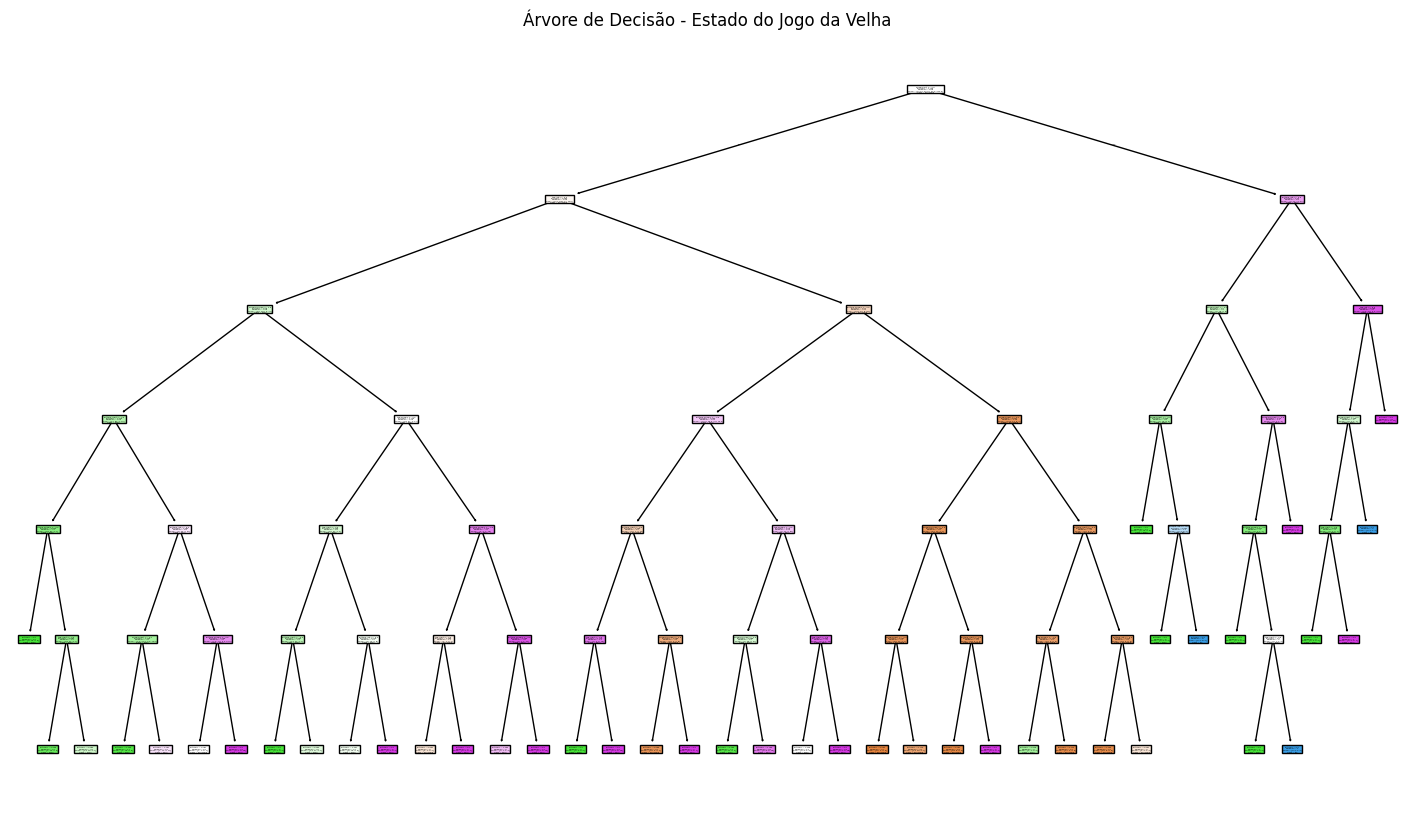

In [19]:

plt.figure(figsize=(18, 10))
plot_tree(model, filled=True, feature_names=[
    'top-left', 'top-middle', 'top-right',
    'middle-left', 'middle-middle', 'middle-right',
    'bottom-left', 'bottom-middle', 'bottom-right'
], class_names=model.classes_)
plt.title("Árvore de Decisão - Estado do Jogo da Velha")
plt.show()